In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [33]:
data = pd.read_csv('dataset_reformate2.csv')

data['date'] = pd.to_datetime(data['date'])

country = 'Germany'
country_data = data[data['pays'] == country].set_index('date')

ts = country_data['entree_mensuelle']

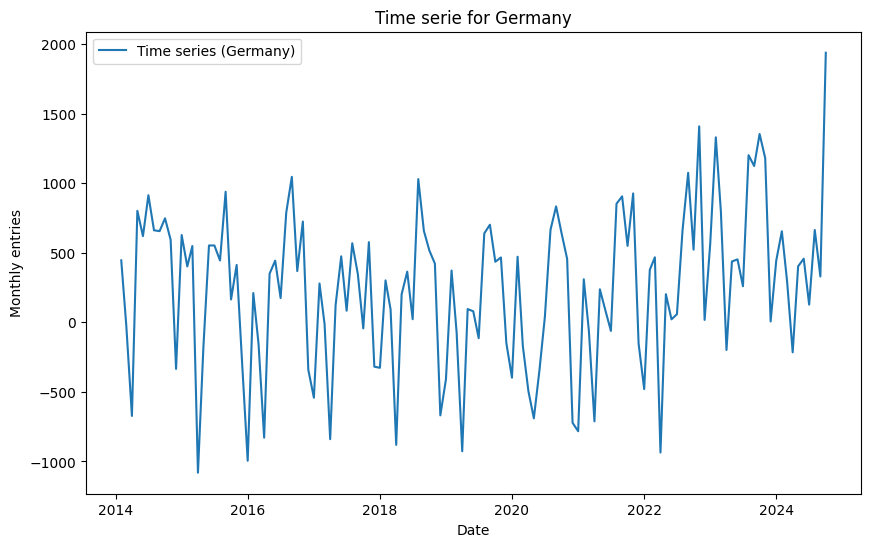

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label=f"Time series ({country})")
plt.title(f"Time serie for {country}")
plt.xlabel('Date')
plt.ylabel('Monthly entries')
plt.legend()
plt.show()

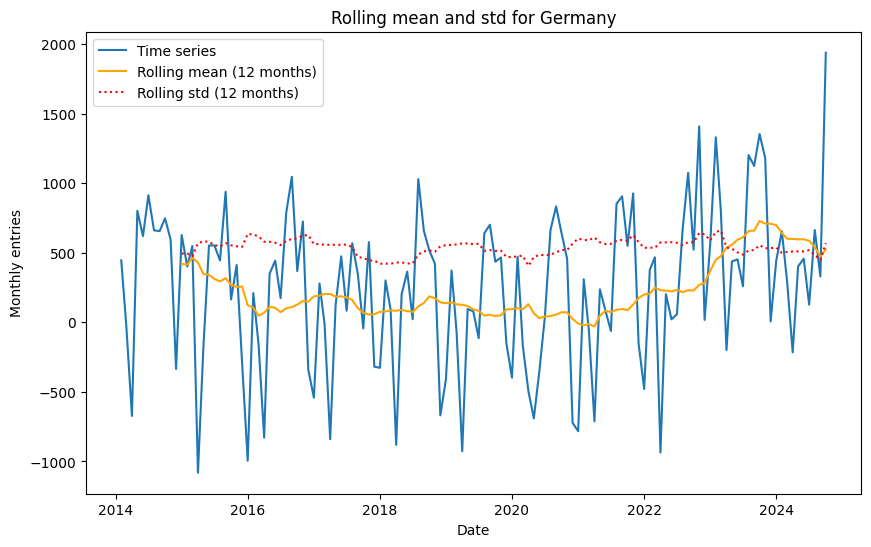

In [45]:
# Moyenne mobile (rolling mean)
rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

# Visualisation de la moyenne mobile
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Time series')
plt.plot(rolling_mean, color='orange', label='Rolling mean (12 months)')
plt.plot(rolling_std, color='red', linestyle='dotted', label='Rolling std (12 months)')
plt.title(f"Rolling mean and std for {country}")
plt.xlabel('Date')
plt.ylabel('Monthly entries')
plt.legend()
plt.show()

In [46]:
# Test de stationnarité avec le test de Dickey-Fuller Augmenté
def test_stationarity(timeseries):
    print("Result of Dickey-Fuller test :")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

test_stationarity(ts)

Result of Dickey-Fuller test :
Test Statistic                  -1.098806
p-value                          0.715548
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


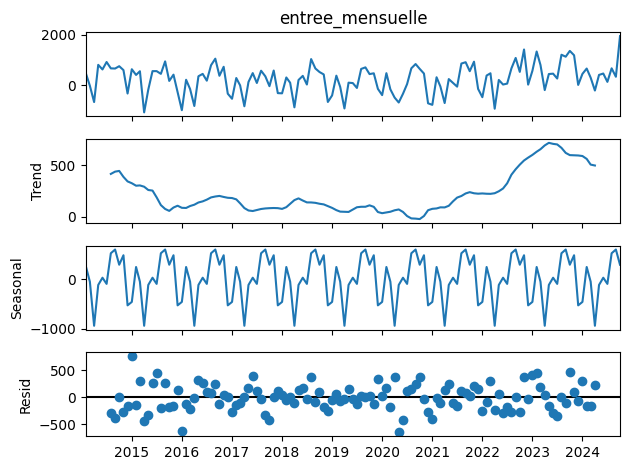

In [37]:
# Décomposer la série temporelle (sans la rendre stationnaire)
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=12)
decomposition.plot()
plt.show()

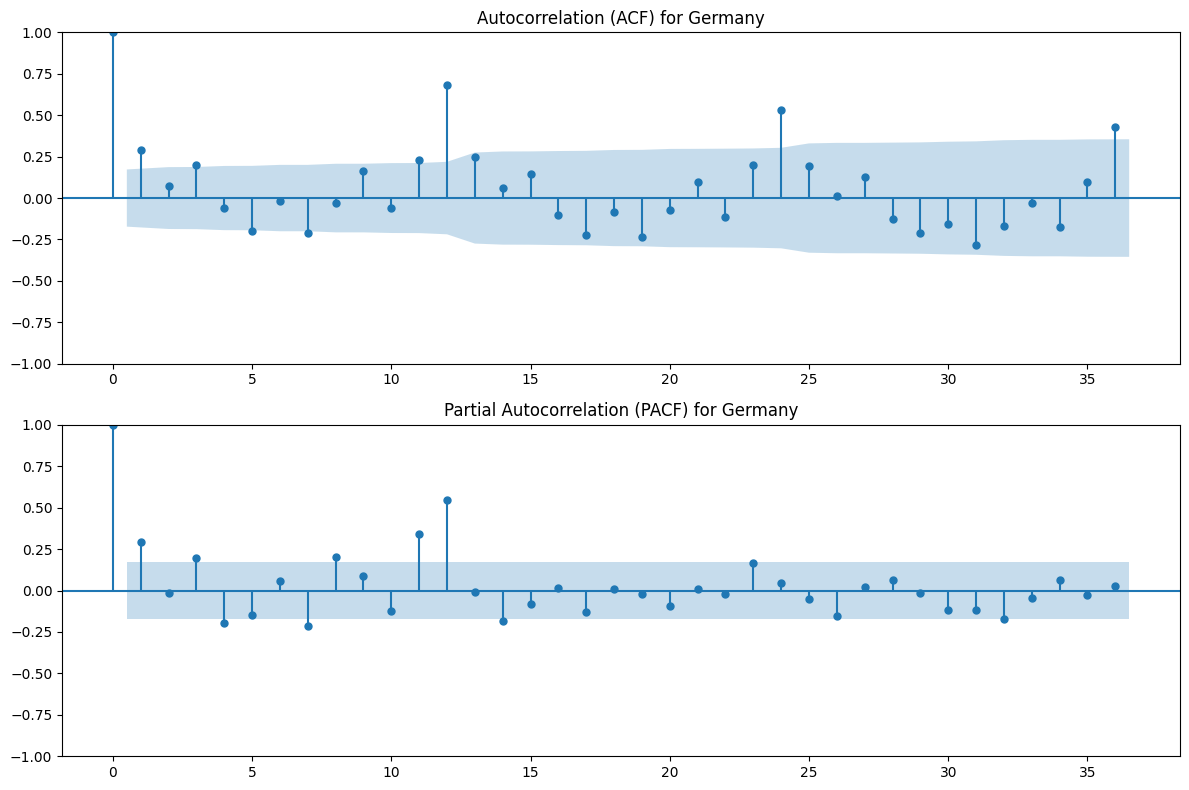

In [47]:
# Autocorrélation (ACF) et Autocorrélation partielle (PACF)
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF
sm.graphics.tsa.plot_acf(ts.dropna(), lags=36, ax=ax[0])
ax[0].set_title(f"Autocorrelation (ACF) for {country}")

# PACF
sm.graphics.tsa.plot_pacf(ts.dropna(), lags=36, ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation (PACF) for {country}")

plt.tight_layout()
plt.show()

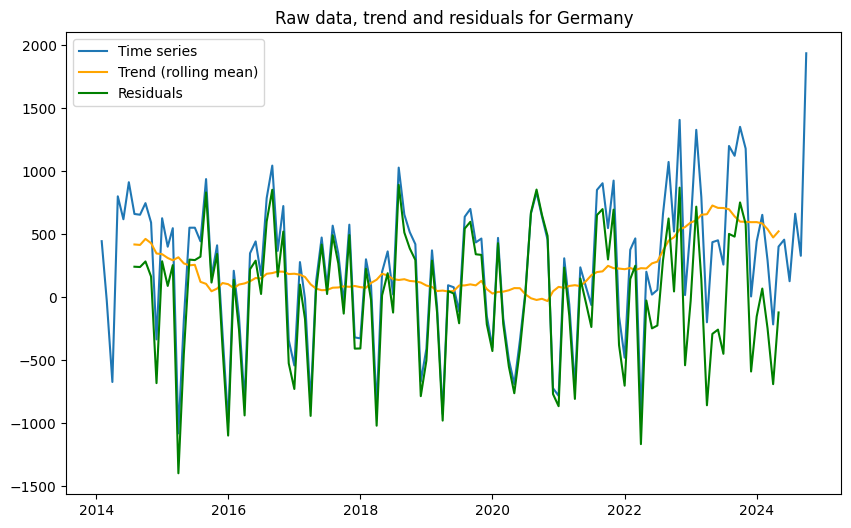

In [48]:
# Calcul de la tendance par moyenne mobile
trend = ts.rolling(window=12, center=True).mean()

# Résidus (données brutes - tendance)
residual = ts - trend

# Visualisation des composantes
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Time series')
plt.plot(trend, label='Trend (rolling mean)', color='orange')
plt.plot(residual, label='Residuals', color='green')
plt.title(f"Raw data, trend and residuals for {country}")
plt.legend()
plt.show()